Turn Analysis Summary:
total_turns: 314
left_turns: 146
right_turns: 168
turn_segments: 629


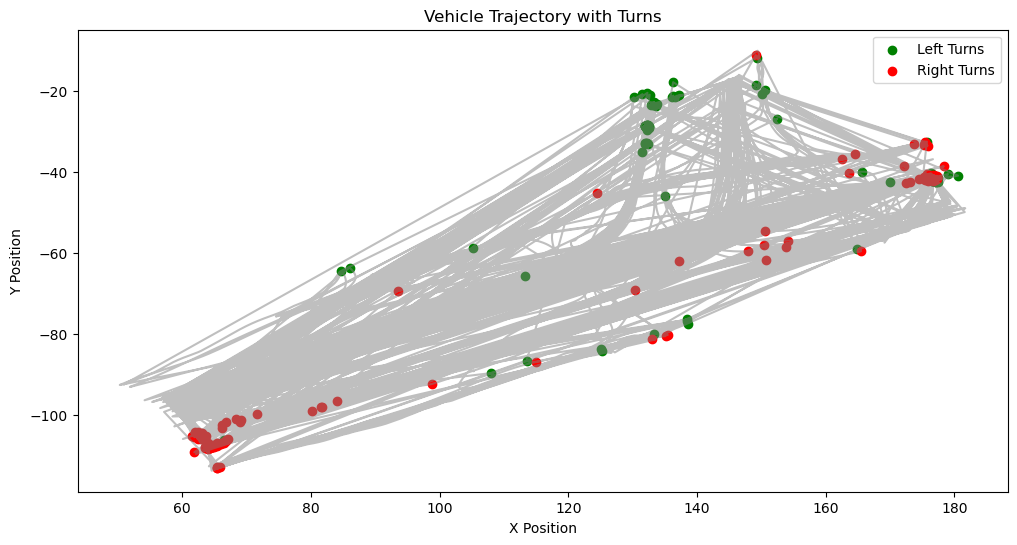

In [ ]:
import pandas as pd
import numpy as np

def label_turns(df, heading_column='heading', turn_threshold=10):
    # Calculate heading change between consecutive frames
    df['heading_change'] = df[heading_column].diff().abs()
    
    # Initialize turn labeling
    df['turn_label'] = 'straight'
    
    # Identify turns
    left_turn_mask = (df['heading_change'] > turn_threshold) & (df[heading_column].diff() > 0)
    right_turn_mask = (df['heading_change'] > turn_threshold) & (df[heading_column].diff() < 0)
    
    df.loc[left_turn_mask, 'turn_label'] = 'left_turn'
    df.loc[right_turn_mask, 'turn_label'] = 'right_turn'
    
    # Optionally, create a continuous turn segment
    df['in_turn'] = df['turn_label'].isin(['left_turn', 'right_turn'])
    
    # Group consecutive turn segments
    df['turn_segment'] = (df['in_turn'] != df['in_turn'].shift()).cumsum()
    
    return df

def analyze_turns(df):

    turn_summary = {
        'total_turns': df[df['turn_label'] != 'straight'].shape[0],
        'left_turns': df[df['turn_label'] == 'left_turn'].shape[0],
        'right_turns': df[df['turn_label'] == 'right_turn'].shape[0],
        'turn_segments': df['turn_segment'].max()
    }
    
    return turn_summary



# Read the CSV file
df = pd.read_csv('./Tracks/00_tracks.csv')

# Label turns
df_with_turns = label_turns(df)

# Analyze turns
turn_analysis = analyze_turns(df_with_turns)

# Print turn summary
print("Turn Analysis Summary:")
for key, value in turn_analysis.items():
    print(f"{key}: {value}")

# Optional: Visualize turns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(df_with_turns['xCenter'], df_with_turns['yCenter'], c='gray', alpha=0.5)

turn_points = df_with_turns[df_with_turns['turn_label'] != 'straight']
left_turns = turn_points[turn_points['turn_label'] == 'left_turn']
right_turns = turn_points[turn_points['turn_label'] == 'right_turn']

plt.scatter(left_turns['xCenter'], left_turns['yCenter'], c='green', label='Left Turns')
plt.scatter(right_turns['xCenter'], right_turns['yCenter'], c='red', label='Right Turns')

plt.title('Vehicle Trajectory with Turns')
plt.xlabel('X Position')
plt.ylabel('Y Position')
plt.legend()
plt.show()





Training set shape: (164212, 10, 7)
Test set shape: (41053, 10, 7)
Turn distribution in training set: 
0    0.998471
1    0.001529
Name: proportion, dtype: float64
Class weights: {0: 1.0, 1: 653.2310756972112}


2024-12-11 20:17:24.483034: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1 Pro
2024-12-11 20:17:24.483066: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 16.00 GB
2024-12-11 20:17:24.483071: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 5.33 GB
2024-12-11 20:17:24.483101: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:303] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-12-11 20:17:24.483114: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:269] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 10, 64)            14016     
                                                                 
 batch_normalization (Batch  (None, 10, 64)            256       
 Normalization)                                                  
                                                                 
 dropout (Dropout)           (None, 10, 64)            0         
                                                                 
 gru_1 (GRU)                 (None, 10, 32)            9408      
                                                                 
 batch_normalization_1 (Bat  (None, 10, 32)            128       
 chNormalization)                                                
                                                                 
 dropout_1 (Dropout)         (None, 10, 32)            0

2024-12-11 20:17:26.139390: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-12-11 20:17:26.558415: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-12-11 20:17:26.980290: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-12-11 20:17:27.146889: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-12-11 20:17:27.985531: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-12-11 20:17:28.146659: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-12-11 20:17:28.308524: I tensorflow/core/grappler/optimizers/cust

1283/1283 [==============================] - ETA: 0s - loss: 1.1702 - accuracy: 0.6894 - precision: 0.0036 - recall: 0.7410

2024-12-11 20:18:01.857680: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-12-11 20:18:02.023874: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-12-11 20:18:02.077544: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-12-11 20:18:02.126477: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1283/1283 [==============================] - 41s 29ms/step - loss: 1.1702 - accuracy: 0.6894 - precision: 0.0036 - recall: 0.7410 - val_loss: 0.4397 - val_accuracy: 0.7555 - val_precision: 0.0048 - val_recall: 0.7619 - lr: 0.0010
Epoch 2/30
1283/1283 [==============================] - 34s 27ms/step - loss: 0.9207 - accuracy: 0.7853 - precision: 0.0056 - recall: 0.7968 - val_loss: 0.4579 - val_accuracy: 0.8550 - val_precision: 0.0090 - val_recall: 0.8571 - lr: 0.0010
Epoch 3/30
1283/1283 [==============================] - 35s 27ms/step - loss: 0.9768 - accuracy: 0.7777 - precision: 0.0056 - recall: 0.8167 - val_loss: 0.4429 - val_accuracy: 0.8595 - val_precision: 0.0090 - val_recall: 0.8254 - lr: 0.0010
Epoch 4/30
1283/1283 [==============================] - 34s 27ms/step - loss: 1.0413 - accuracy: 0.7769 - precision: 0.0056 - recall: 0.8207 - val_loss: 0.3542 - val_accuracy: 0.9110 - val_precision: 0.0141 - val_recall: 0.8254 - lr: 0.0010
Epoch 5/30
1283/1283 [=========================

2024-12-11 20:30:16.590073: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-12-11 20:30:16.692335: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-12-11 20:30:16.760152: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-12-11 20:30:16.812378: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-12-11 20:30:37.501514: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-12-11 20:30:37.616328: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-12-11 20:30:37.679770: I tensorflow/core/grappler/optimizers/cust


Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.96      0.98     40990
           1       0.03      0.86      0.06        63

    accuracy                           0.96     41053
   macro avg       0.52      0.91      0.52     41053
weighted avg       1.00      0.96      0.98     41053



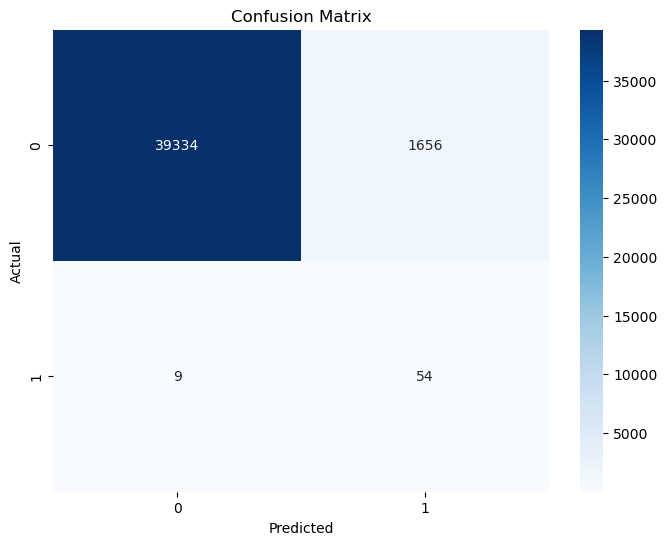

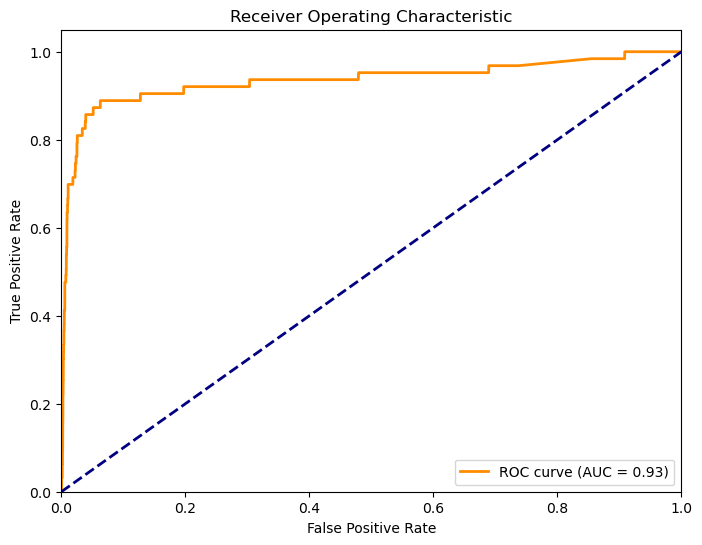

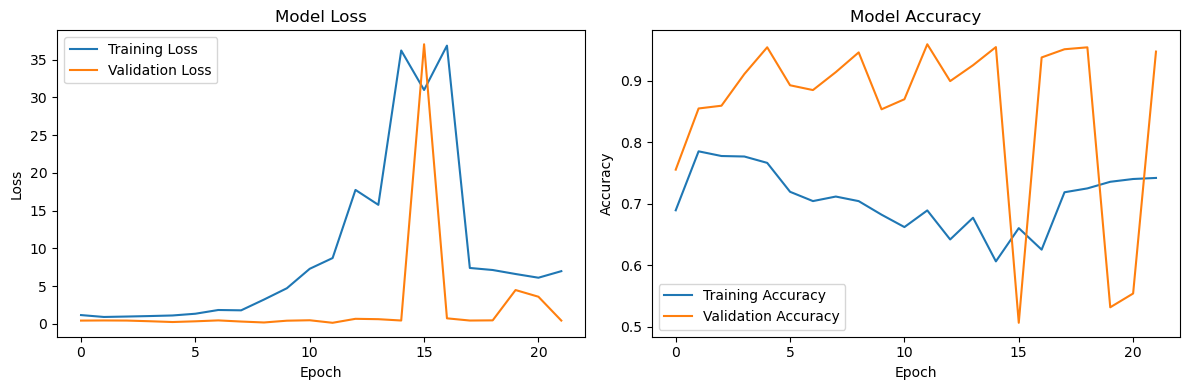

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report, confusion_matrix
import gc

class TurnPredictionPipeline:
    def __init__(self, csv_path):
        """Initialize the pipeline with memory optimization settings"""
        # Enable memory growth for GPU
        physical_devices = tf.config.list_physical_devices('GPU')
        if physical_devices:
            for device in physical_devices:
                tf.config.experimental.set_memory_growth(device, True)
        
        # Read CSV
        self.df = pd.read_csv(csv_path)
        self.X = None
        self.y = None
        self.model = None
        self.class_weights = None
        
    def label_turns(self, heading_threshold=10):
        """Label vehicle turns with fixed array lengths"""
        # Calculate heading change
        self.df['heading_change'] = self.df['heading'].diff()
        
        # Initialize turn label column
        self.df['turn_label'] = 'straight'
        
        # Create boolean masks for turns
        heading_change = self.df['heading_change'].fillna(0)
        left_mask = (heading_change > heading_threshold)
        right_mask = (heading_change < -heading_threshold)
        
        # Apply labels
        self.df.loc[left_mask, 'turn_label'] = 'left_turn'
        self.df.loc[right_mask, 'turn_label'] = 'right_turn'
        
        # Clean up
        gc.collect()
        
    def create_sequences(self, data, window_size):
        """Memory-efficient sequence creation using generators"""
        for i in range(len(data) - window_size):
            yield data[i:(i + window_size)]
    
    def feature_engineering(self, window_size=10, batch_size=32):
        """Memory-efficient feature engineering with batch processing"""
        # Label turns first
        self.label_turns()
        
        # Convert turn labels to binary
        self.df['turn_binary'] = (self.df['turn_label'] != 'straight').astype(np.int8)
        
        # Select features
        features = [
            'xCenter', 'yCenter', 'heading',
            'xVelocity', 'yVelocity',
            'xAcceleration', 'yAcceleration'
        ]
        
        # Normalize features
        scaler = MinMaxScaler()
        scaled_features = scaler.fit_transform(self.df[features].astype(np.float32))
        
        # Create sequences using generator
        sequences = list(self.create_sequences(scaled_features, window_size))
        labels = self.df['turn_binary'].iloc[window_size:].values
        
        # Convert to numpy arrays
        self.X = np.array(sequences, dtype=np.float32)
        self.y = np.array(labels, dtype=np.int8)
        
        # Split data
        self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(
            self.X, self.y, test_size=0.2, random_state=42, stratify=self.y
        )
        
        # Calculate class weights
        total_samples = len(self.y_train)
        n_turns = np.sum(self.y_train)
        n_non_turns = total_samples - n_turns
        
        self.class_weights = {
            0: 1.0,
            1: n_non_turns / n_turns
        }
        
        # Clear unnecessary data
        del sequences, labels, scaled_features
        gc.collect()
        
        print(f"Training set shape: {self.X_train.shape}")
        print(f"Test set shape: {self.X_test.shape}")
        print(f"Turn distribution in training set: \n{pd.Series(self.y_train).value_counts(normalize=True)}")
        print(f"Class weights: {self.class_weights}")
        
    def build_rnn_model(self, input_shape):
        """Build memory-efficient RNN model"""
        with tf.device('/CPU:0'):
            self.model = tf.keras.Sequential([
                tf.keras.layers.Input(shape=input_shape),
                
                # First GRU layer
                tf.keras.layers.GRU(64, return_sequences=True),
                tf.keras.layers.BatchNormalization(),
                tf.keras.layers.Dropout(0.3),
                
                # Second GRU layer
                tf.keras.layers.GRU(32, return_sequences=True),
                tf.keras.layers.BatchNormalization(),
                tf.keras.layers.Dropout(0.3),
                
                # Third GRU layer
                tf.keras.layers.GRU(16),
                tf.keras.layers.BatchNormalization(),
                tf.keras.layers.Dropout(0.3),
                
                # Dense layers
                tf.keras.layers.Dense(16, activation='relu'),
                tf.keras.layers.Dense(8, activation='relu'),
                tf.keras.layers.Dense(1, activation='sigmoid')
            ])
        
        self.model.compile(
            optimizer=tf.keras.optimizers.legacy.Adam(learning_rate=0.001),
            loss=tf.keras.losses.BinaryCrossentropy(from_logits=False),
            metrics=[
                'accuracy',
                tf.keras.metrics.Precision(),
                tf.keras.metrics.Recall()
            ]
        )
        
        print(self.model.summary())
        
    def train_model(self, epochs=30, batch_size=128):
        """Train model with memory-efficient settings"""
        callbacks = [
            tf.keras.callbacks.EarlyStopping(
                monitor='val_loss',
                patience=10,
                restore_best_weights=True
            ),
            tf.keras.callbacks.ReduceLROnPlateau(
                monitor='val_loss',
                factor=0.2,
                patience=5,
                min_lr=1e-6
            )
        ]
        
        # Use tf.data API for efficient data loading
        train_dataset = tf.data.Dataset.from_tensor_slices(
            (self.X_train, self.y_train)
        ).batch(batch_size).prefetch(tf.data.AUTOTUNE)
        
        val_dataset = tf.data.Dataset.from_tensor_slices(
            (self.X_test, self.y_test)
        ).batch(batch_size).prefetch(tf.data.AUTOTUNE)
        
        history = self.model.fit(
            train_dataset,
            validation_data=val_dataset,
            epochs=epochs,
            callbacks=callbacks,
            class_weight=self.class_weights,
            verbose=1
        )
        
        return history
    
    def evaluate_model(self, batch_size=128):
        """Memory-efficient model evaluation"""
        # Batched predictions
        test_dataset = tf.data.Dataset.from_tensor_slices(self.X_test).batch(batch_size)
        y_pred = []
        
        for batch in test_dataset:
            batch_pred = self.model.predict(batch, verbose=0)
            y_pred.append(batch_pred)
            
        y_pred = np.concatenate(y_pred).flatten()
        y_pred_binary = (y_pred > 0.5).astype(np.int8)
        
        # Print metrics
        print("\nClassification Report:")
        print(classification_report(self.y_test, y_pred_binary))
        
        # Plot confusion matrix
        plt.figure(figsize=(8, 6))
        cm = confusion_matrix(self.y_test, y_pred_binary)
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
        plt.title('Confusion Matrix')
        plt.xlabel('Predicted')
        plt.ylabel('Actual')
        plt.show()
        plt.close()
        
        # Plot ROC curve
        from sklearn.metrics import roc_curve, auc
        fpr, tpr, _ = roc_curve(self.y_test, y_pred)
        roc_auc = auc(fpr, tpr)
        
        plt.figure(figsize=(8, 6))
        plt.plot(fpr, tpr, color='darkorange', lw=2, 
                label=f'ROC curve (AUC = {roc_auc:.2f})')
        plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('Receiver Operating Characteristic')
        plt.legend(loc="lower right")
        plt.show()
        plt.close()


# Initialize pipeline
pipeline = TurnPredictionPipeline('Tracks/00_tracks.csv')

# Process data
pipeline.feature_engineering(window_size=10)

# Build and train model
pipeline.build_rnn_model(input_shape=(10, 7))
history = pipeline.train_model(epochs=30, batch_size=128)

# Evaluate
pipeline.evaluate_model()

# Plot training history
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.tight_layout()
plt.show()
plt.close()
